# Tutorial 7.2: Diverse Dynamical Systems from Similar Circuit Architectures
### Neuroscience goal:
- learn how near-identical circuits can produce very different types of activity
- learn how highly simplified neural circuits cna nevertheless produce complex patterns of activity
### Computational goal:
- practice using matrices, arrays, to simulate coupled units
- understand the idea of using a single function to simulate multiple types of circuit by changing particular parameters

### Overview
for each question, simulate a two-unit or three-unit circuit, with connection matrices defines as:

$$
\underline{\underline{W}} = {\begin{pmatrix}
W_{11} & W_{12} \\
W_{21} & W_{22} \\
\end{pmatrix}}_{}
$$

or

$$
\underline{\underline{W}}= {\begin{pmatrix}
W_{11} & W_{12} & W_{13}\\
W_{21} & W_{22} & W_{23}\\
W_{31} & W_{32} & W_{33} \\
\end{pmatrix}}_{}
$$

respectively, where $W_{ji}$ is the connection strength from unit $j$ to unit $i$

each unit, $i$, responds to a total input current, $I_i$, given by:

$$
I_i = I_i^{(app)} + \sum_{j=1}^{N_{units}}W_{ji}r_j
$$

where $I_i^{(app)}$ is an external, applied current. each unit responds with a threshold-linear firing-rate curve, so that:

$$
\tau \frac{dr_i}{dt} = -r_i + I_i - \Theta_i
$$

with time constant $\tau$ = 10ms, and where $\Theta_i$ is the threshold for unit $i$

if the threshold is negative, it indicates the level of spontaneous activity in the unit in the absence of input current

to ensure rates are positive and do not exceed a maximum, include the following constraint conditions:

$
0 \le r_i \le r_{max}
$

where $r_{max}$ = 100hz

the values of connections strengths and threshold will vary across the nine circuits simulated

for each circuit, determine what sort of dynamical system is produced
- e.g., find number of distinct states within the circuit, or whether the system is chaotic, or possesses a heteroclinic sequence 
- use pulses of applied current or changes in initial conditions to aid in analysis


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# constants
tau = 10e-3
r_max = 100

# time vector
dt = 0.1e-3
t = np.arange(0, 3, dt)

In [15]:
# define functions

# update ODE
def update_r(r, i_app, w, theta):
    n_units = len(r)
    i_total = [i_app[i] + sum([w[i][j] * r[j] for j in range(n_units)]) for i in range(n_units)]
    return [-r[i] + i_total[i] - theta[i] for i in range(n_units)]

# run simulation
def simulate_circuit(w, i_app, theta):
    # initialize time, firing rate vectors
    n_units = len(w)
    r = np.zeros((n_units, len(t)))

    # simulate over time
    for i in range(1, len(t)):
        drdt = update_r(r[:, i-1], i_app, w, theta)
        r[:, i] = r[:, i-1] + np.multiply(drdt, dt)

        # rates are positive and under r_max
        r[:, i] = np.clip(r[:, i], 0, r_max) 

    return r

# plotting
def plot_dynamics(t, r):
    fig, ax = plt.subplots()
    for i, rates in enumerate(r):
        ax.plot(t, rates, label=f'unit {i+1}')
    
    ax.set_xlabel('time (s)')
    ax.set_ylabel('firing rate (hz)')
    ax.legend()
    plt.show()
    


### define params per question

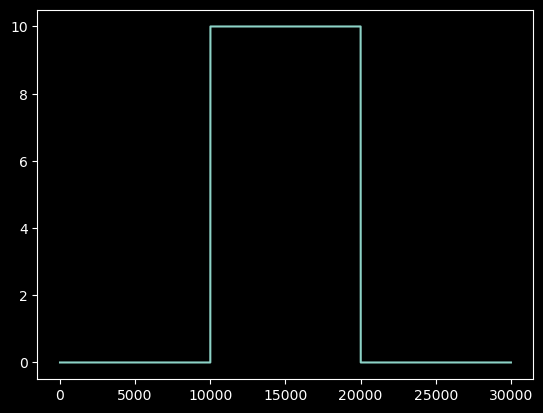

In [29]:
# applied current options
i_empty = np.zeros_like(t)
i_stim = np.zeros_like(t)
i_stim[10000:20000] += 10
plt.plot(i_stim)

In [37]:
# q1
w1 = np.array([[0.6, 1],
               [-0.2, 0]])
theta1 = np.array([-5, -10])

# q2
w2 = np.array([[1.2, -0.3],
               [-0.2, 1.1]])
theta2 = np.array([10, 5])

# q3
w3 = np.array([[2.5, 2],
               [-3.0, -2]])
theta3 = np.array([-10, 0])

# q4
w4 = np.array([[0.8, -0.2],
               [-0.4, 0.6]])
theta4 = np.array([-10, -10])

# q5
w5 = np.array([[2, 1],
               [-1.5, 0]])
theta5 = np.array([0, 20])

# q6
w6 = np.array([[1.5, 0, 1],
               [0, 2, 1],
               [-2.5, -3, -1]])
theta6 = np.array([-10, -5, 5])

# q7
w7 = np.array([[2.2, -0.5, 0.9],
               [-0.7, 2, 1.2],
               [-1.6, -1.2, 0]])
theta7 = np.array([-18, -15, 0])

# q8
w8 = np.array([[2.05, -0.2, 1.2],
               [-0.05, 2.1, 0.5],
               [-1.6, -4, 0]])
theta8 = np.array([-10, -20, 10])

# q9
w9 = np.array([[0.98, -0.015, -0.01],
               [0, 0.99, -0.02],
               [-0.02, 0.005, 1.01]])
theta9 = np.array([-2, -1, -1])

In [ ]:
parameter_sets = [
    {"w": w1, "theta": theta1, "question": "q1"},
    {"w": w2, "theta": theta2, "question": "q2"},
    {"w": w3, "theta": theta3, "question": "q3"},
    {"w": w4, "theta": theta4, "question": "q4"},
    {"w": w5, "theta": theta5, "question": "q5"},
    {"w": w6, "theta": theta6, "question": "q6"},
    {"w": w7, "theta": theta7, "question": "q7"},
    {"w": w8, "theta": theta8, "question": "q8"},
    {"w": w9, "theta": theta9, "question": "q9"}
]

# Looping through each set of parameters:
for params in parameter_sets:
    print(f"Simulating for {params['question']}")
    r = simulate_circuit(params['w'], i_stim, params['theta'])  # 'None' assumes you're not varying i_app in this setup.
    plot_dynamics(t, r)
